# Анализ продаж компьютерных видеоигр

**Цель исследования**:

1. Провести анализ данных о продажах компьютерных игр, об оценках пользователей и экспертов, жанрах игр и платформах.
2. Выявить закономерности, определяющие успешность игры.
3. Сформулировать выводы и сделать базовые рекомендации по ставке на потенциально популярный продукт для планирования рекламных кампаний для интернет-магазина «Стримчик».

  **Ход исследования:**
    Данные я получу из файла `/datasets/games.csv`. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.
    
    Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы и приступлю к проведению исследовательского анализа. Затем на основании полученных данных составлю портреты пользователей каждого региона продаж игр. Далее проверю гипотезы о средних пользовательских рейтингах.
    
    Таким образом, мое исследование пройдет в шесть этапов:
    - Загрузка и обзор данных.
    - Предобработка данных.
    - Проведение исследовательского анализа данных.
    - Составление портрета пользователя.
    - Проверка гипотез.
    - Написание общего вывода.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format='{:,.3f}'.format
rcParams['figure.figsize'] = 10, 7

## Загрузка и обзор данных

In [ ]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net//datasets/games.csv')

In [ ]:
display(data.head())
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.000",Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,"1,985.000",Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.000",Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,"2,009.000",Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.000",Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# предварительно ознакомимься с основными статистическими показателями числовых столбцов
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.000","16,715.000","16,715.000","16,715.000","16,715.000","8,137.000"
mean,"2,006.485",0.263,0.145,0.078,0.047,68.968
std,5.877,0.814,0.503,0.309,0.187,13.938
min,"1,980.000",0.000,0.000,0.000,0.000,13.000
25%,"2,003.000",0.000,0.000,0.000,0.000,60.000
50%,"2,007.000",0.080,0.020,0.000,0.010,71.000
75%,"2,010.000",0.240,0.110,0.040,0.030,79.000
max,"2,016.000",41.360,28.960,10.220,10.570,98.000


В данных представлны игры, выпущенные с 1980 по 2016 год, максимальный объем продаж приходится на Северную Америку, минимальная оценка критиков - 13, максимальная - 98. Аномальных значений при первичном ознакомлении с числовыми данными не выявлено.

**Вывод по разделу "Загрузка и обзор данных":**

1. В полученных данных есть информация о 16715 видеоиграх с указанием названия игры, платформы, года выпуска, жанра, объема продаж в Северно Америке, Европе, Японии, других странах, оценки критиков, оценки пользователей и рейтинга возрастной категории по ESRB.
2. В данных представлны игры, выпущенные с 1980 по 2016 год
3. Установлено наличие пропусков по 6 показателям: `Name`, `Year_of_release`, `Genre`,  `Critic_score`, `User_score`, `Rating`
4. Установлено несоответствие типов данных столбцов `Year_of_release`, `User_Score`, поэтому в разделе 2 проекта приведем данные к нужным типам.
5. Аномальных значений при первичном ознакомлении с числовыми данными не выявлено.

## Предобработка данных

In [ ]:
# сделаем контроль размера датасета до и после обработки.
data_copy = data.copy()
len(data_copy)

16715

### Переименование столбцов

Приведем наименования столбцов к нижнему регистру

In [ ]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование типов данных

In [ ]:
data[['year_of_release', 'user_score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_release  16446 non-null  float64
 1   user_score       10014 non-null  object 
dtypes: float64(1), object(1)
memory usage: 261.3+ KB


**В столбце `year_of_release`** с годом выпуска установлен формат данных `float64`, приведем столбец к целочисленному значению.

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['year_of_release'].head()

,year_of_release
0,2006
1,1985
2,2008
3,2009
4,1996


**В столбце `user_score`** установлен формат данных `object`, приведем столбец к численному типу при помощи функции `pandas.to_numeric()`. Сначала изучим уникальные значения этого столбца.

In [ ]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
data[data['user_score'] == 'tbd']['user_score'].count()

np.int64(2424)

У 2424 видеоигр в качестве оценки пользователей проставлено значение **`'tbd'` - "To Be Determined"**, что означает "Будет определено". Логично заменить это значение на NaN как отсутствие оценки.

In [ ]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [ ]:
data[['year_of_release', 'user_score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_release  16446 non-null  Int64  
 1   user_score       7590 non-null   float64
dtypes: Int64(1), float64(1)
memory usage: 277.6 KB


### Обработка пропусков

In [ ]:
# изучим пропуски в данных
data.isna().sum()

,0
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,9125


In [ ]:
pd.DataFrame(round(data.isna().mean()*100, 1)).style.background_gradient('turbo')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


Наибольшее количество **пропусков в оценках игр: `critic_score` - 51,3% данных, `user_score` - 54,6%**. Скорее всего многие игры просто не были оценены. Также потери данных могут быть связаны с получением информации из открытых источников, возможно часть данных была утеряна по техническим причинам при копировании, считывании или записи датасета. Логически заменить эти данные не представляется возможным, доля пропусков в данных очень высока. Заменим пропуски в этих столбцах "заглушками" вне диапазона имеющихся значений.

In [ ]:
sorted(data['critic_score'].unique())[:15]

[np.float64(76.0),
 np.float64(nan),
 np.float64(13.0),
 np.float64(17.0),
 np.float64(19.0),
 np.float64(20.0),
 np.float64(21.0),
 np.float64(22.0),
 np.float64(23.0),
 np.float64(24.0),
 np.float64(25.0),
 np.float64(26.0),
 np.float64(27.0),
 np.float64(28.0),
 np.float64(29.0)]

In [ ]:
sorted(data['user_score'].unique(), reverse=True)[:15]

[np.float64(nan),
 np.float64(9.7),
 np.float64(9.6),
 np.float64(9.5),
 np.float64(9.4),
 np.float64(9.3),
 np.float64(9.2),
 np.float64(9.1),
 np.float64(9.0),
 np.float64(8.9),
 np.float64(8.8),
 np.float64(8.7),
 np.float64(8.6),
 np.float64(8.5),
 np.float64(8.4)]

In [ ]:
data[['critic_score', 'user_score']] = \
data[['critic_score', 'user_score']].fillna(10.0)

У 40,5% данных **пропущены значения рейтинга возрастной категории по ESRB `rating`**, это связано в первую очередь с тем, что эта негосударственная организация по определению рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде была основана в 1994, в нашем же датасете игры, выпущенные начиная с 1980 года. Логически заполнить пропуски не представляется возможным, поэтому проставим 'unknown'.

In [ ]:
data['rating'] = data['rating'].fillna('unknown')

У двух игр установлено **отсутствие данных в названии и жанре**, выпущенных в 1993 году, данные 23-летней давности не представляют собой ценности для исследовательского анализа потенциально популярного продукта на будущий год, удалим эти две игры из данных

In [ ]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.780,0.530,0.000,0.080,10.000,10.000,unknown
14244,NaN,GEN,1993,NaN,0.000,0.000,0.030,0.000,10.000,10.000,unknown


In [ ]:
data=data.dropna(subset = ['name'])
data[data['name'].isna()]['name'].count()

np.int64(0)

Установлено **отсутствие данных о годе выпуска в столбце `year_of_release`** у 269 игр (1,6% данных), в случае указания года выпуска в названии игры возьмем это значение для заполнения пропуска

In [ ]:
# функция разделения наименования игры на подстроки
def name_split(row):
    try:
        return row['name'].split(' ')
    except:
        pass

data['name_split'] = data.apply(name_split, axis=1)

# проверим работу функции
data[['name', 'name_split']].head()

,name,name_split
0,Wii Sports,"[Wii, Sports]"
1,Super Mario Bros.,"[Super, Mario, Bros.]"
2,Mario Kart Wii,"[Mario, Kart, Wii]"
3,Wii Sports Resort,"[Wii, Sports, Resort]"
4,Pokemon Red/Pokemon Blue,"[Pokemon, Red/Pokemon, Blue]"


In [ ]:
data['year_of_release'].min(), data['year_of_release'].max()

(np.int64(1980), np.int64(2016))

In [ ]:
# создадим список с годами выпуска игр и переведем данные в строчный формат
list_years=list(range(1980, 2017))
list_years_str=list(map(str, list_years))

In [ ]:
# функция выделения года выпуска игры из наименования игры
def year_of_release(name_split):
    for i in name_split:
        if i in list_years_str:
            return int(i)
data['year_from_name']=data['name_split'].apply(year_of_release)
data['year_from_name'] = data['year_from_name'].astype('Int64')

# проверим работу функции
data[data['year_of_release'].isna()][['name', 'year_of_release', 'year_from_name']].head()

,name,year_of_release,year_from_name
183,Madden NFL 2004,<NA>,2004
377,FIFA Soccer 2004,<NA>,2004
456,LEGO Batman: The Videogame,<NA>,<NA>
475,wwe Smackdown vs. Raw 2006,<NA>,2006
609,Space Invaders,<NA>,<NA>


In [ ]:
# заполним пропуски в 'year_of_release' полученными данными о годе выпуска из наименования игры
data['year_of_release'] = data['year_of_release'].fillna(data['year_from_name'])
data[data['year_from_name'].isna()==False][['name', 'year_of_release', 'year_from_name']].sample(5)

,name,year_of_release,year_from_name
2144,NHL 2001,2000,2001
926,FIFA 2000,1998,2000
2317,NBA Live 2005,2004,2005
7106,NBA ShootOut 2003,2002,2003
10451,Gallop Racer 2006,2005,2006


In [ ]:
# посчитаем количество замен пропусков
data_copy['Year_of_Release'].isna().sum()-data['year_of_release'].isna().sum()

np.int64(15)

У 15 видеоигр заполнили пропущенные значения в столбце `year_of_release` значениями года выпуска из названия игры, оставшиеся пропуски заменим "заглушками" вне диапазона имеющихся значений.

In [ ]:
data['year_of_release'] = data['year_of_release'].fillna(10.0)

In [ ]:
# очистим датафрейм от ненужных столбцов
data=data.drop(columns=['name_split', 'year_from_name'])

In [ ]:
# проверим датафрейм после обработки на количество пропущенных значений
data.isna().sum()

,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,0
user_score,0


### Обработка дубликатов

Проверим датафрейм на явные дубликаты

In [ ]:
data.duplicated().sum()

np.int64(0)

Проверим наличие дубликатов по сочетанию столбцов `name`, `platform`

In [ ]:
data[['name', 'platform']].duplicated().sum()

np.int64(4)

In [ ]:
data[data[['name', 'platform']].duplicated()][['name', 'platform']]

,name,platform
1591,Need for Speed: Most Wanted,X360
4127,Sonic the Hedgehog,PS3
11715,Need for Speed: Most Wanted,PC
16230,Madden NFL 13,PS3


Исследуем 4 дублирующихся игры с указанием платформы

In [ ]:
(data[(data['name'] == 'Need for Speed: Most Wanted') & (data['platform'] == 'X360') |
     (data['name'] == 'Sonic the Hedgehog') & (data['platform'] == 'PS3') |
     (data['name'] == 'Need for Speed: Most Wanted') & (data['platform'] == 'PC') |
     (data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3')]
).sort_values(['name'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.110,0.220,0.000,0.230,83.000,5.500,E
16230,Madden NFL 13,PS3,2012,Sports,0.000,0.010,0.000,0.000,83.000,5.500,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.620,0.780,0.010,0.150,83.000,8.500,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.000,0.130,0.020,0.100,83.000,8.500,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.020,0.230,0.000,0.040,82.000,8.500,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.000,0.060,0.000,0.020,82.000,8.500,T
1745,Sonic the Hedgehog,PS3,2006,Platform,0.410,0.060,0.040,0.660,43.000,4.100,E10+
4127,Sonic the Hedgehog,PS3,10,Platform,0.000,0.480,0.000,0.000,43.000,4.100,E10+


У дублирующихся игр выявлены отличия в годе выпуска и объемах продаж. Жанр, оценки критиков и пользователей, рейтинги полностью дублируются. Скорее всего ошибочно внесены неверные даты релиза с выделением продаж в отдельную строку, укажем верный год на основании данных открытых интернет-источников (Need for Speed: Most Wanted на платформах X360, PC - 2005 год, Sonic the Hedgehog на платформе PS3 - 2006 год), объеденим продажи и удалим дубликаты.

In [ ]:
data = data.drop_duplicates(subset=['name', 'platform']).reset_index(drop=True)

In [ ]:
(data[(data['name'] == 'Need for Speed: Most Wanted') & (data['platform'] == 'X360') |
     (data['name'] == 'Sonic the Hedgehog') & (data['platform'] == 'PS3') |
     (data['name'] == 'Need for Speed: Most Wanted') & (data['platform'] == 'PC') |
     (data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3')]
).sort_values(['name'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.110,0.220,0.000,0.230,83.000,5.500,E
1189,Need for Speed: Most Wanted,X360,2012,Racing,0.620,0.780,0.010,0.150,83.000,8.500,T
5969,Need for Speed: Most Wanted,PC,2005,Racing,0.020,0.230,0.000,0.040,82.000,8.500,T
1743,Sonic the Hedgehog,PS3,2006,Platform,0.410,0.060,0.040,0.660,43.000,4.100,E10+


In [ ]:
# исправим год выпуска игры "Need for Speed: Most Wanted" на платформе X360 с 2012 на 2005 год
data.at[1189, 'year_of_release'] = 2005

In [ ]:
# подсчитаем продажи и исправим значения для "Madden NFL 13" платформа PS3
data.at[604, 'eu_sales'] = 0.23

# подсчитаем продажи и исправим значения для "Need for Speed: Most Wanted" платформа X360
data.at[1189, 'na_sales'] = 1.62
data.at[1189, 'eu_sales'] = 0.91
data.at[1189, 'jp_sales'] = 0.03
data.at[1189, 'other_sales'] = 0.25

# подсчитаем продажи и исправим значения для "Need for Speed: Most Wanted" платформа PC
data.at[5969, 'eu_sales'] = 0.29
data.at[5969, 'other_sales'] = 0.06

# подсчитаем продажи и исправим значения для "Sonic the Hedgehog" платформа PS3
data.at[1743, 'eu_sales'] = 0.54

In [ ]:
# проверим внесенные данные
(data[(data['name'] == 'Need for Speed: Most Wanted') & (data['platform'] == 'X360') |
     (data['name'] == 'Sonic the Hedgehog') & (data['platform'] == 'PS3') |
     (data['name'] == 'Need for Speed: Most Wanted') & (data['platform'] == 'PC') |
     (data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3')]
).sort_values(['name'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.110,0.230,0.000,0.230,83.000,5.500,E
1189,Need for Speed: Most Wanted,X360,2005,Racing,1.620,0.910,0.030,0.250,83.000,8.500,T
5969,Need for Speed: Most Wanted,PC,2005,Racing,0.020,0.290,0.000,0.060,82.000,8.500,T
1743,Sonic the Hedgehog,PS3,2006,Platform,0.410,0.540,0.040,0.660,43.000,4.100,E10+


In [ ]:
data[['name', 'platform']].duplicated().sum()

np.int64(0)

### Добавление новых столбцов

Создадим новый столбец с суммарными продажами во всех регионах `total_sales`.

In [ ]:
# data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
# data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()

In [ ]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,41.360,28.960,3.770,8.450,82.540
1,29.080,3.580,6.810,0.770,40.240
2,15.680,12.760,3.790,3.290,35.520
3,15.610,10.930,3.280,2.950,32.770
4,11.270,8.890,10.220,1.000,31.380


In [ ]:
# сделаем контроль размера датасета после обработки.
a, b = len(data_copy), len(data)
print(a, b, a-b, round((a-b)/a*100, 2))

16715 16709 6 0.04


In [ ]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,"16,709.000","16,709.000","16,709.000","16,709.000","16,709.000","16,709.000","16,709.000","16,709.000"
mean,"1,976.254",0.263,0.145,0.078,0.047,38.701,8.695,0.533
std,243.879,0.814,0.503,0.309,0.187,31.036,1.752,1.549
min,10.000,0.000,0.000,0.000,0.000,10.000,0.000,0.000
25%,"2,003.000",0.000,0.000,0.000,0.000,10.000,7.600,0.060
50%,"2,007.000",0.080,0.020,0.000,0.010,10.000,10.000,0.170
75%,"2,010.000",0.240,0.110,0.040,0.030,70.000,10.000,0.470
max,"2,016.000",41.360,28.960,10.220,10.570,98.000,10.000,82.540


**Вывод по разделу "Предобработка данных":**
1. Наименования столбцов привели к нижнему регистру.
2. Преобразовали типы данных у столбцов:
- `year_of_release` привели к целочисленному значению,
- `user_score`- к числовому формату.
3. У 2424 видеоигр оценку пользователей `'tbd'`("будет определено") заменили значение NaN как отсутствие оценки.
4. У 15 видеоигр в столбце `year_of_release` заполнили пропущенные значения данными о годе выпуска, указанном в названии игры.
5. Пропуски в столбцах `critic_score`, `user_score`, `year_of_release` заменили "заглушками", значение заглушек во всех указанных столбцах приняли равным 10.0.
6. В столбце `rating` пропущенные значения заменили на 'unknown'.
7. Удалили данные о 2 видеоиграх без указания названия, удалили 4 дубликата игр  (удалено 0,04% данных).
8. Создали новый столбец с суммарными продажами во всех регионах `total_sales`.

## Проведение исследовательского анализа данных

**Создадим фильтры** для заглушек `mask_critic_score`, `mask_user_score`, `mask_year_of_release`

In [ ]:
# фильтры для заглушек
mask_critic_score = data['critic_score'] != 10
mask_user_score = data['user_score'] != 10
mask_year_of_release = data['year_of_release'] != 10

### Исследуем количество выпущенных игр по годам

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360,28.960,3.770,8.450,76.000,8.000,E,82.540
1,Super Mario Bros.,NES,1985,Platform,29.080,3.580,6.810,0.770,10.000,10.000,unknown,40.240
2,Mario Kart Wii,Wii,2008,Racing,15.680,12.760,3.790,3.290,82.000,8.300,E,35.520
3,Wii Sports Resort,Wii,2009,Sports,15.610,10.930,3.280,2.950,80.000,8.000,E,32.770
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270,8.890,10.220,1.000,10.000,10.000,unknown,31.380


In [ ]:
data_years=data[mask_year_of_release].groupby('year_of_release', as_index = False)['name'].count()
data_years

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


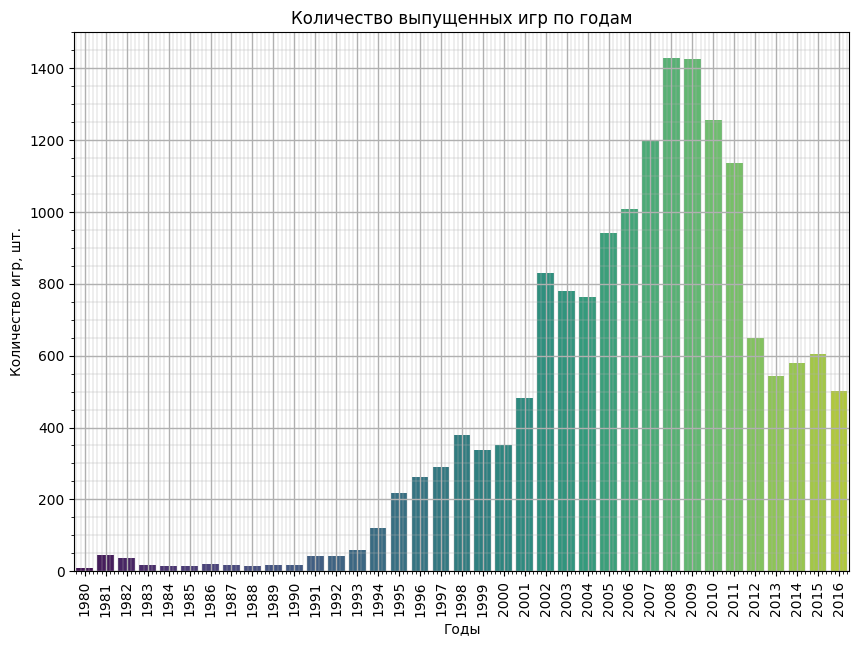

In [ ]:
ax=sns.barplot(y='name', x='year_of_release', data=data_years, palette=sns.color_palette('viridis', 40))
ax.set_title('Количество выпущенных игр по годам', size=12)
ax.set_xlabel('Годы', size=10)
ax.set_ylabel('Количество игр, шт.', size=10)
ax.grid(False)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.xticks(rotation=90)
plt.show()

*Представлены данные о выпуске видеоигр начиная с 1980 года, заметный рост объема выпущенных игр виден с 1994-1995 годов - создано свыше 200 видеоигр. Пик объема выпуска игр приходится на 2008-2009 годы - более 1400 видеигр, с 2012 наблюдается спад производства, далее почти равномерный ежегодный выпуск - 500-600 видеоигр.*

### Исследуем продажи игр по платформам

In [ ]:
data_platform=(data.groupby('platform', as_index = False).
               agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False))
data_platform

,platform,total_sales
16,PS2,"1,255.770"
28,X360,971.420
17,PS3,939.650
26,Wii,907.510
4,DS,806.120
15,PS,730.860
6,GBA,317.850
18,PS4,314.140
19,PSP,294.050
13,PC,259.520


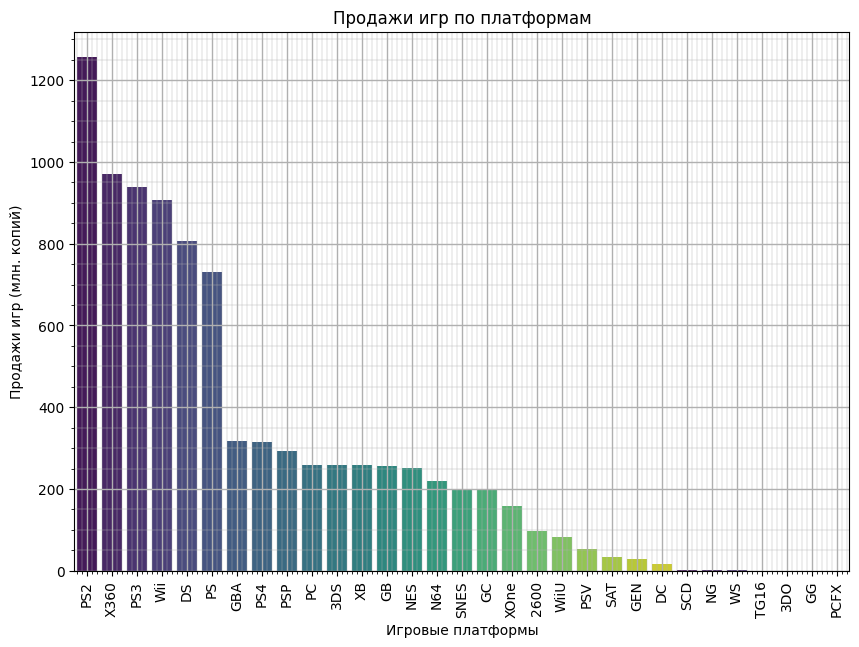

In [ ]:
ax=sns.barplot(y='total_sales', x='platform', data=data_platform, palette=sns.color_palette('viridis', 24))
ax.set_title('Продажи игр по платформам', size=12)
ax.set_xlabel('Игровые платформы', size=10)
ax.set_ylabel('Продажи игр (млн. копий)', size=10)
ax.grid(False)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.xticks(rotation=90)
plt.show()

*По продажам за весь рассматриваемый период лидируют платформы: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. Для платформ с наибольшими суммарными продажами построим распределение по годам.*

In [ ]:
# создадим список топ-6 платформ
data_platform_top=data_platform[:6]
platform_top_list=data_platform_top['platform'].to_list()
platform_top_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [ ]:
platform_top_years=data[mask_year_of_release].query('platform in @platform_top_list').groupby(
    ['platform', 'year_of_release'], as_index = False).agg({'total_sales': 'sum'})
platform_top_years

,platform,year_of_release,total_sales
0,DS,1985,0.020
1,DS,2004,17.270
2,DS,2005,130.140
3,DS,2006,119.810
4,DS,2007,146.940
5,DS,2008,145.320
6,DS,2009,119.540
7,DS,2010,85.020
8,DS,2011,26.180
9,DS,2012,11.010


У платформы DS аномальный разрыв в годах с 1985 по 2004, из открытых интрнет источников установлено, что NDS (либо DS) — карманные игровые консоли компании Nintendo были выпущены в 2004 году. Отфильтруем игру 1985 года на платформе DS.

In [ ]:
data[(data['year_of_release'] == 1985) & (data['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15952,Strongest Tokyo University Shogi DS,DS,1985,Action,0.000,0.000,0.020,0.000,10.000,10.000,unknown,0.020


Согласно открытым интернет источникам игра Strongest Tokyo University Shogi на платформке DS выпущена в 2005 году, исправим данные и переформируем `platform_top_years`.

In [ ]:
data.at[15952, 'year_of_release'] = 2005
platform_top_years=data[mask_year_of_release].query('platform in @platform_top_list').groupby(
    ['platform', 'year_of_release'], as_index = False).agg({'total_sales': 'sum'})

**Для платформ с наибольшими суммарными продажами (топ-6) построим распределение продаж по годам.**

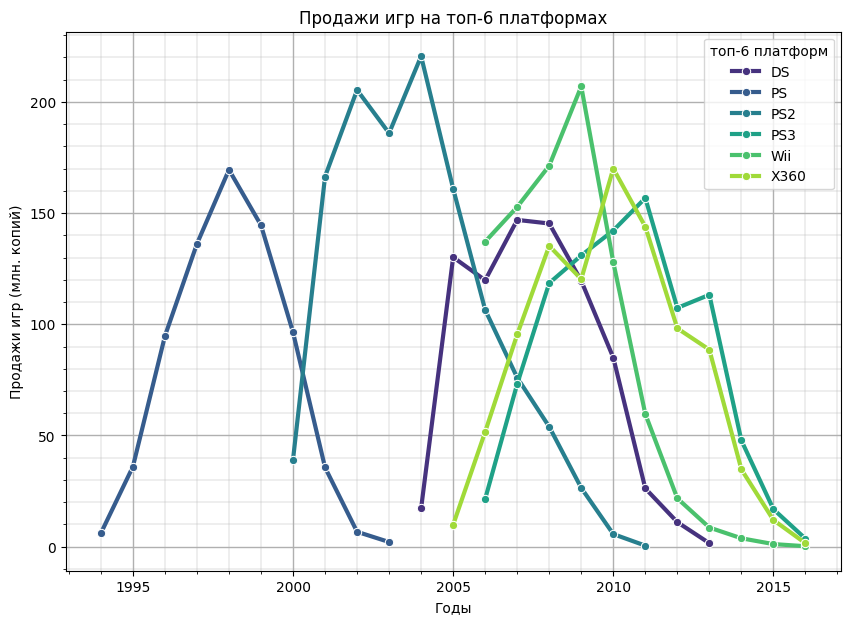

In [ ]:
ax=sns.lineplot(
    y='total_sales',
    x='year_of_release',
    data=platform_top_years,
    hue='platform',
    linewidth = 3,
    marker='o',
    palette=sns.color_palette('viridis', 6)
)
ax.set_title('Продажи игр на топ-6 платформах', size=12)
ax.set_xlabel('Годы', size=10)
ax.set_ylabel('Продажи игр (млн. копий)', size=10)
ax.legend(title='топ-6 платформ')
ax.grid(False)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.show()

*Lifetime игровых топ-6 платформ примерно одинаковая - на промежутках в 9-11 лет наблюдаем резкий подъем и резкий спад продаж. Рассчитаем для всех платформ их период жизни для расчета среднего значения.*

In [ ]:
# расчитаем lifetime для каждой платформы, исключив платформу 'PC' c продолжительностью жизни 31 год
platform_years_min=data[mask_year_of_release].groupby(
    ['platform'], as_index = False).agg({'year_of_release': 'min'})
platform_years_max=data[mask_year_of_release].groupby(
    ['platform'], as_index = False).agg({'year_of_release': 'max'})
data_lifetime_platform = platform_years_min.merge(platform_years_max, on=["platform"], suffixes=('_min', '_max'))
data_lifetime_platform['lifetime_platform']=data_lifetime_platform['year_of_release_max']-data_lifetime_platform['year_of_release_min']
data_lifetime_platform = data_lifetime_platform.loc[data_lifetime_platform['platform'] != 'PC']
data_lifetime_platform.sort_values(by='year_of_release_min')

,platform,year_of_release_min,year_of_release_max,lifetime_platform
0,2600,1980,1989,9
11,NES,1983,1994,11
5,GB,1988,2001,13
8,GEN,1990,1994,4
23,SNES,1990,1999,9
9,GG,1992,1992,0
22,SCD,1993,1994,1
12,NG,1993,1996,3
1,3DO,1994,1995,1
21,SAT,1994,1999,5


*Новые платформы создавались с промежутком от 0 до 3 лет, самый большой перерыв в создании новых платформ был 5 лет - с 1983 по 1988 год и с 2006 по 2011 год.*

In [ ]:
# рассчитаем среднее значение продолжительности жизни платформ
data_lifetime_platform.describe()['lifetime_platform']

,lifetime_platform
count,30.000
mean,6.200
std,3.934
min,0.000
25%,3.000
50%,6.000
75%,9.750
max,13.000


**С целью прогнозирования необходимо взять данные за последние 2-3 года, тем более у нас сфера видеоигр, где технические новшества и игровые тренды  быстро меняются, поэтому возьмем для исследовательского анализа данные за последние 3 года - с 2014 по 2016 год.**

**Исследуем продажи игр по платформам за период с 2014 по 2016 год**

In [ ]:
data_platform_after_2013=(data.query('year_of_release >2013').groupby('platform', as_index = False).
               agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False))
data_platform_after_2013

,platform,total_sales
3,PS4,288.150
9,XOne,140.360
0,3DS,86.680
2,PS3,68.180
8,X360,48.220
7,WiiU,42.980
1,PC,27.050
5,PSV,22.400
6,Wii,5.070
4,PSP,0.360


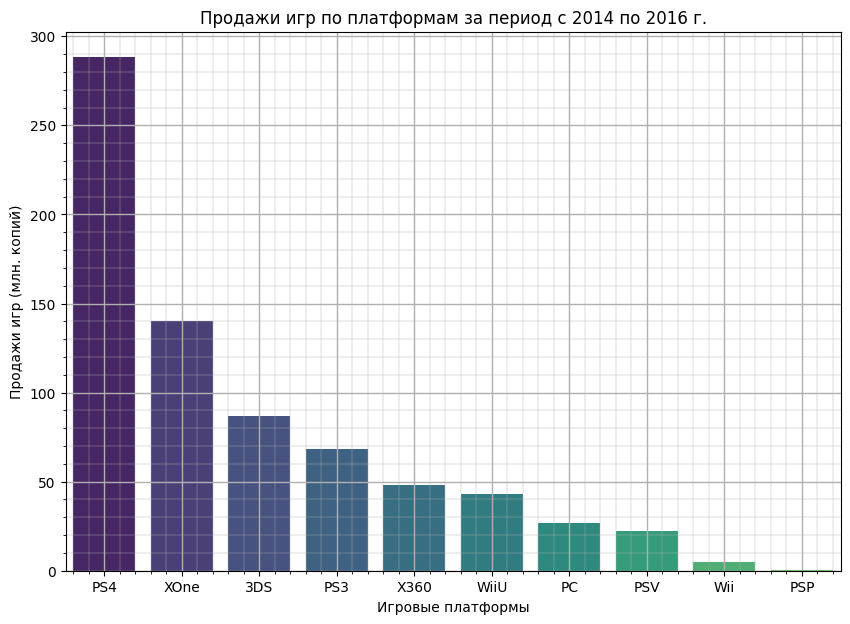

In [ ]:
ax=sns.barplot(y='total_sales', x='platform', data=data_platform_after_2013, palette=sns.color_palette('viridis', 12))
ax.set_title('Продажи игр по платформам за период с 2014 по 2016 г.', size=12)
ax.set_xlabel('Игровые платформы', size=10)
ax.set_ylabel('Продажи игр (млн. копий)', size=10)
ax.grid(False)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.show()

*Самой продаваемой после 2014 года стала платформа 'PS4' с объемом продаж за период с 2014 по 2016 год - 288 млн. копий, далее по убывающей - 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP'.*

**Построим распределение продаж по годам для всех платформ за период с 2014 по 2016 год.**

In [ ]:
data_platform_after_2013_years=data.query('year_of_release >2013').groupby(
    ['platform', 'year_of_release'], as_index = False).agg({'total_sales': 'sum'})

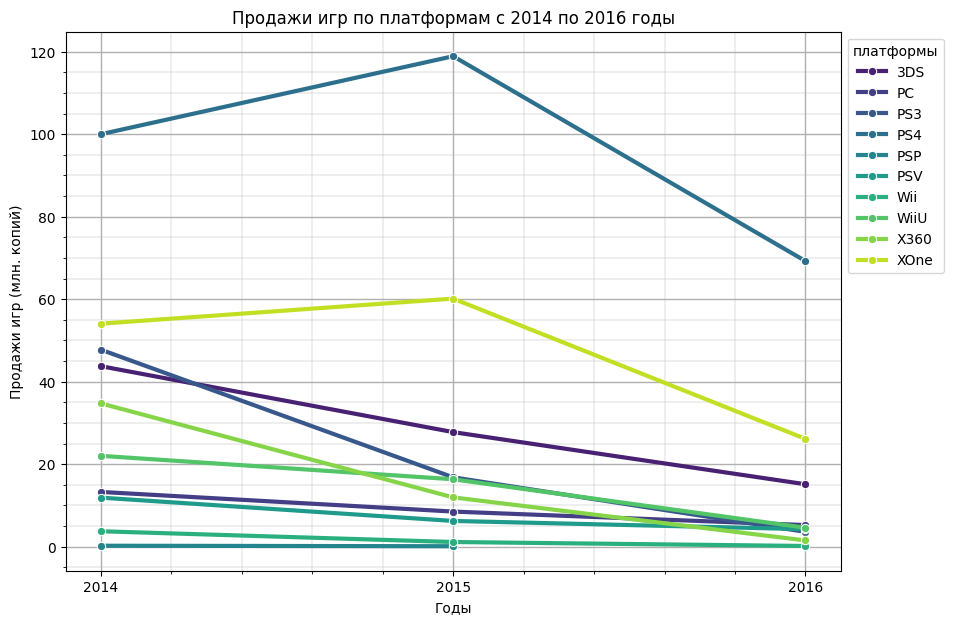

In [ ]:
import matplotlib.ticker as ticker
ax=sns.lineplot(
    y='total_sales',
    x='year_of_release',
    data=data_platform_after_2013_years,
    hue='platform',
    linewidth = 3,
    marker='o',
    palette=sns.color_palette('viridis', 10)
)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_title('Продажи игр по платформам с 2014 по 2016 годы', size=12)
ax.set_xlabel('Годы', size=10)
ax.set_ylabel('Продажи игр (млн. копий)', size=10)
ax.legend(title='платформы', loc = 'upper left', bbox_to_anchor = (1, 1))
ax.grid(False)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.show()

**Для выявления наиболее потенциально прибыльных платформ проанализируем продажи за последний 2016 год и lifetime платформ на момент исследования**

In [ ]:
# отфильтруем продажи по платформам за 2016 год и укажем lifetime платформ на конец 2016 года
new=data_platform_after_2013_years.query('year_of_release==2016').sort_values(
    by='total_sales', ascending=False
)[['platform', 'total_sales']]
new=new.rename(columns={'total_sales': 'sales_2016'})
new= new.merge(data_lifetime_platform, on=["platform"])
new[['platform', 'sales_2016', 'lifetime_platform']]

,platform,sales_2016,lifetime_platform
0,PS4,69.250,3
1,XOne,26.150,3
2,3DS,15.140,5
3,WiiU,4.600,4
4,PSV,4.250,5
5,PS3,3.600,10
6,X360,1.520,11
7,Wii,0.180,10


*На момент проведения анализа в 2016 году по продажам лидируют платформы 'PS4' - 69,25 млн.копий за 2016 год, 'XOne' - 26,15 млн.копий, '3DS' - 15,14 млн.копий. Продажи по всем платформам на данный момент падают после прохождения пика подъема.*

*Наиболее **перспективными в плане продаж** явлюятся платформы **'PS4', 'XOne' и '3DS'**. Пик продаж 'PS4' и 'XOne' приходится на 2015 год, обе испытывают спад производства в течение последнего года, продолжительность жизни на момент анализа составляет 3 года при среднем значении 6 лет, что дает вероятность продолжения их продаж в течении еще 1-3 лет. На платформу '3DS' стоит обратить внимание в краткосрочной перспективе, т.к ее lifetime на момент исследования уже составляет 5 лет.*

**Построим график «ящик с усами» продаж игр по перспективным платформам 'PS4', 'XOne' и '3DS'.**

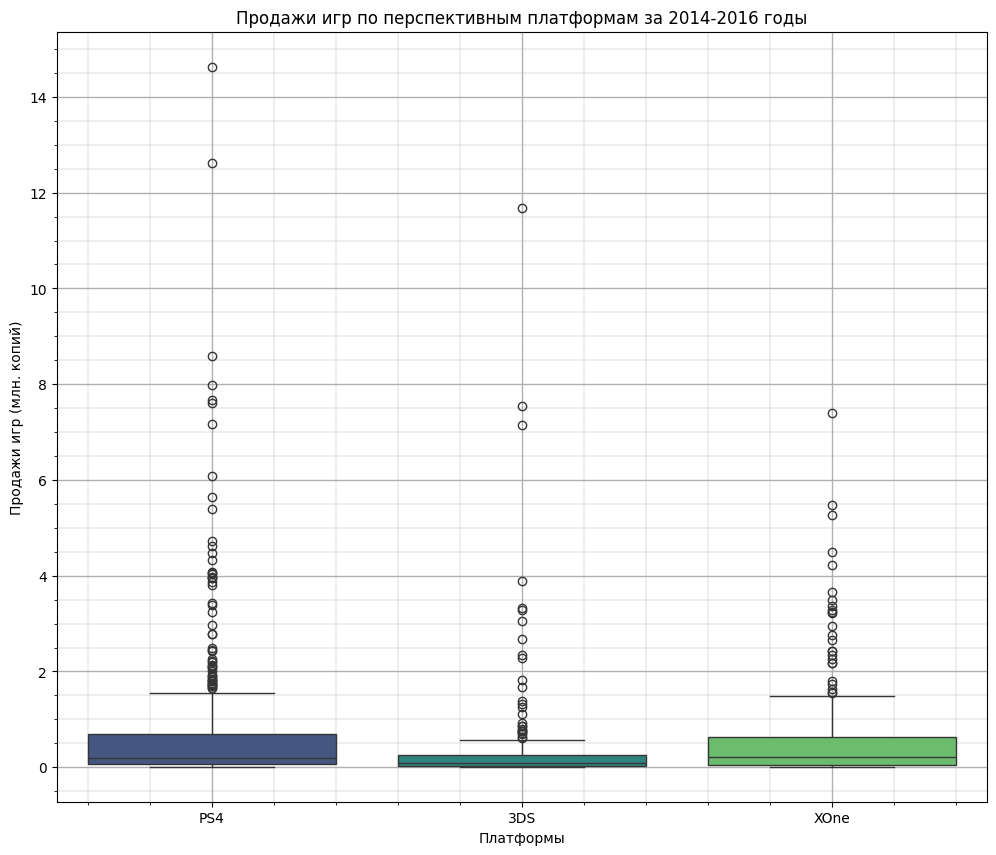

In [ ]:
plt.figure(figsize=(12, 10))
ax=sns.boxplot(
        data=data.query('year_of_release >2013 and (platform == "PS4" or platform == "XOne" or platform == "3DS")'),
        x='platform',
        y='total_sales',
        palette=sns.color_palette('viridis', 3)
    )
ax.set_title('Продажи игр по перспективным платформам за 2014-2016 годы', size=12)
ax.set_xlabel('Платформы', size=10)
ax.set_ylabel('Продажи игр (млн. копий)', size=10)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.show()

In [ ]:
data[(data['year_of_release']>2013) & (data['total_sales']>=2) & (
    (data['platform'] == "PS4") | (data['platform'] == "XOne") | (data['platform'] == "3DS")
)]['name'].count()

np.int64(69)

*По всем трем перспективным платформам есть аномально высокие продажи, более 69 игр продано в объеме от 2 до 14 млн.копий.*

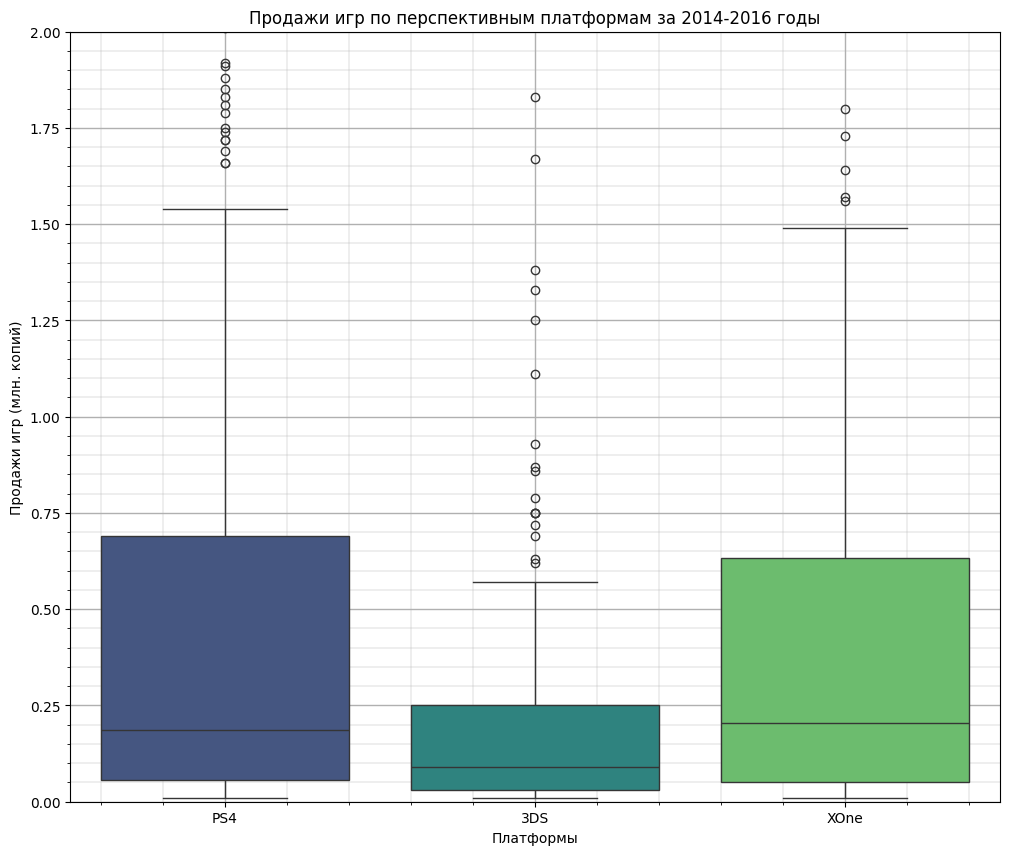

In [ ]:
# ограничим выводимое значение продаж до 2 млн. копий
plt.figure(figsize=(12, 10))
ax=sns.boxplot(
        data=data.query('year_of_release >2013 and (platform == "PS4" or platform == "XOne" or platform == "3DS")'),
        x='platform',
        y='total_sales',
        palette=sns.color_palette('viridis', 3)
    )
ax.set_title('Продажи игр по перспективным платформам за 2014-2016 годы', size=12)
ax.set_xlabel('Платформы', size=10)
ax.set_ylabel('Продажи игр (млн. копий)', size=10)
ax.set_ylim(0, 2)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.show()

*Меньше всего размах значений продаж у платформы '3DS' (около 500 тыс.копий), у 'PS4' и 'XOne' в три раза больше - до 1,5 млн.копий. Самое высокое медианное значение глобальных продаж у платформы 'XOne' - более 205 тыс. копий, 'PS4' - 185 тыс. копий, '3DS' - 90 тыс. копий.*

**Исследуем зависимость продаж игр от оценки критиков и пользователей.**

Построим диаграмму рассеяния и рассчитаем коэффициент корреляции Пирсена для самой популярной на момнт исследования платформы - 'PS4'.

In [ ]:
# приведем фильтры для заглушек
mask_critic_score = data['critic_score'] != 10
mask_user_score = data['user_score'] != 10

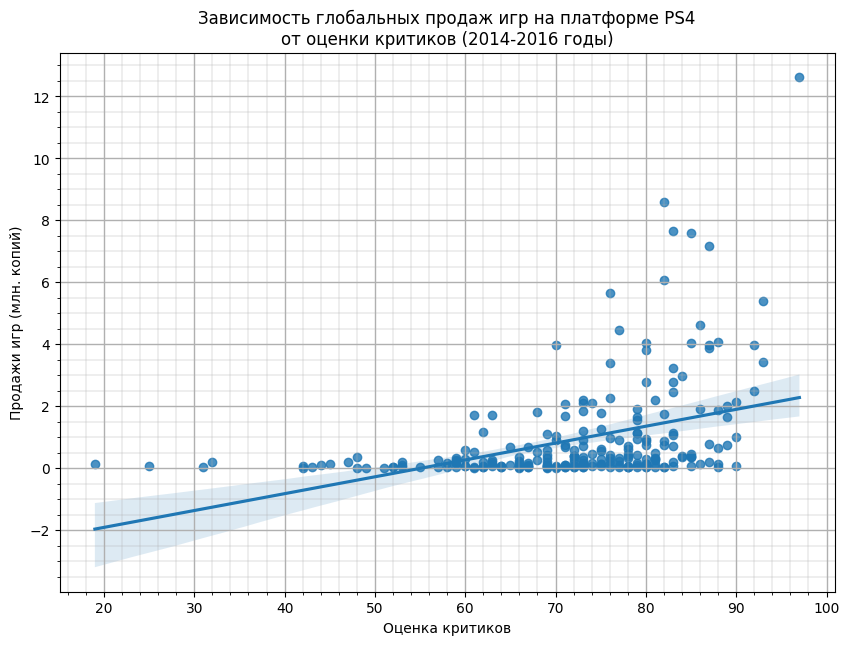

In [ ]:
# применим фильтры для заглушек
ax=sns.regplot(
    x='critic_score',
    y='total_sales',
    data=data[mask_critic_score].query('year_of_release >2013 & platform=="PS4"'))
ax.set_title('''Зависимость глобальных продаж игр на платформе PS4
от оценки критиков (2014-2016 годы)''', size=12)
ax.set_xlabel('Оценка критиков', size=10)
ax.set_ylabel('Продажи игр (млн. копий)', size=10)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.show()

In [ ]:
# применим фильтры для заглушек
print('Коэффициент корреляции продаж игр и оценки критиков: {:.2f}'.format(data[mask_critic_score].query(
    'year_of_release >2013 & platform=="PS4"')['critic_score'].
    corr(data[mask_critic_score].query('year_of_release >2013 & platform=="PS4"')['total_sales'])))

Коэффициент корреляции продаж игр и оценки критиков: 0.40


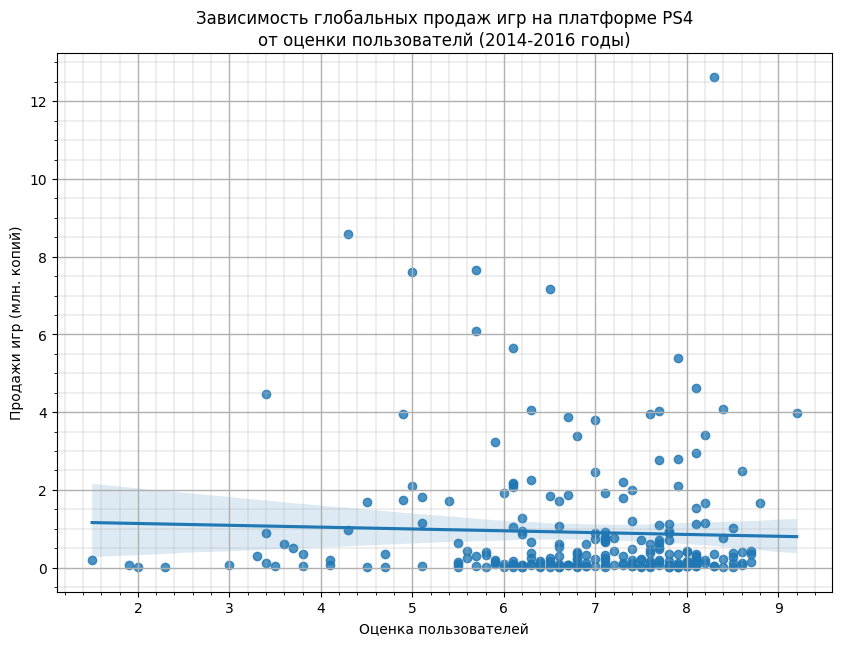

In [ ]:
# применим фильтры для заглушек
ax=sns.regplot(
    x='user_score',
    y='total_sales',
    data=data[mask_user_score].query('year_of_release >2013 & platform=="PS4"'))
ax.set_title('''Зависимость глобальных продаж игр на платформе PS4
от оценки пользователй (2014-2016 годы)''', size=12)
ax.set_xlabel('Оценка пользователей', size=10)
ax.set_ylabel('Продажи игр (млн. копий)', size=10)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.show()

In [ ]:
# применим фильтры для заглушек
print('Коэффициент корреляции продаж игр и оценки пользователй: {:.2f}'.format(data[mask_user_score].query(
    'year_of_release >2013 & platform=="PS4"')['user_score'].
    corr(data[mask_user_score].query('year_of_release >2013 & platform=="PS4"')['total_sales'])))

Коэффициент корреляции продаж игр и оценки пользователй: -0.04


*Для платформы 'PS4' наблюдается средняя положительная корреляция продажи игр и оценки критиков и слабая отрицательная корреляция продажи игр и оценки пользователей.*

Проанализируем зависимость продаж игр от оценки критиков и пользователей для остальных платформ ('XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV'), на которых выпускались игры в 2014-2016 годах, рассчитаем коэфициенты корреляции.

In [ ]:
list_platform= ['XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV']
print('Коэффициенты корреляции продаж игр и оценки:')

for platform in list_platform:
    print('-'*100)
    print(platform)
    print(
        'критиков: {:.2f}'.format(
        data[(data['platform'] == platform) & (data['year_of_release']>2013) & mask_critic_score]['critic_score']
        .corr(data[(data['platform'] == platform) & (data['year_of_release']>2013) & mask_critic_score]['total_sales'])
        )
    )
    print(
        'пользователй: {:.2f}'.format(
        data[(data['platform'] == platform) & (data['year_of_release']>2013) & mask_user_score]['user_score']
        .corr(data[(data['platform'] == platform) & (data['year_of_release']>2013) & mask_user_score]['total_sales'])
        )
    )

Коэффициенты корреляции продаж игр и оценки:
----------------------------------------------------------------------------------------------------
XOne
критиков: 0.43
пользователй: -0.07
----------------------------------------------------------------------------------------------------
3DS
критиков: 0.31
пользователй: 0.22
----------------------------------------------------------------------------------------------------
PS3
критиков: 0.45
пользователй: -0.17
----------------------------------------------------------------------------------------------------
X360
критиков: 0.53
пользователй: -0.14
----------------------------------------------------------------------------------------------------
WiiU
критиков: 0.37
пользователй: 0.41
----------------------------------------------------------------------------------------------------
PC
критиков: 0.17
пользователй: -0.07
----------------------------------------------------------------------------------------------------
PSV
критиков: 

*По всем платформам наблюдается средняя и высокая положительная корреляция продажи игр и оценки критиков (за исключением 'PC', 'PCV'- слабая положительная). Взаимосвязь между объемами продаж и оценками пользователей установлена только у платформы WiiU - средняя положительная, по остальным платформам взаимосвязь не установлена (корреляция или отрицательная или слабая положительная)*

### Исследуем продажи игр по жанрам

**Посмотрим на распределение игр по жанрам в 2014-2016 годах**

In [ ]:
df_=(data[data['year_of_release']>2013]
     .groupby('genre', as_index = False)['name']
     .count().sort_values('name', ascending=False))
df_

,genre,name
0,Action,619
7,Role-Playing,221
1,Adventure,185
10,Sports,161
8,Shooter,128
3,Misc,113
6,Racing,69
2,Fighting,60
9,Simulation,44
4,Platform,38


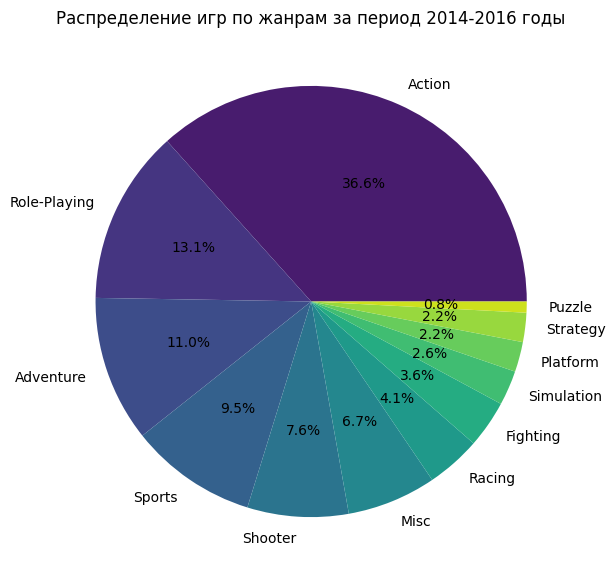

In [ ]:
plt.pie(df_['name'], labels=df_['genre'], \
           colors=sns.color_palette('viridis', 12), \
           autopct='%.1f%%')
plt.title('Распределение игр по жанрам за период 2014-2016 годы', size=12)
plt.show()

*Самые распространенные жанры игр - Action (36,6%), Role-Playing (13,1%), Adventure (11,0%), Sports (9,5%), Shooter (7,6%) и Misc (6,7%). Меньше всего выпущено игр жанров Puzzle (0,8%) и Strategy (2,2%).*

**Проанализируем распределение продаж по жанрам в 2014-2016 годах**

In [ ]:
# проанализируем суммарные продажи игр по жанрам
data_genre_total_after_2013=(data[data['year_of_release']>2013].groupby('genre', as_index = False).
               agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False))
data_genre_total_after_2013

,genre,total_sales
0,Action,199.360
8,Shooter,170.940
10,Sports,109.480
7,Role-Playing,101.440
3,Misc,37.550
2,Fighting,28.220
6,Racing,27.520
4,Platform,18.090
1,Adventure,17.550
9,Simulation,13.130


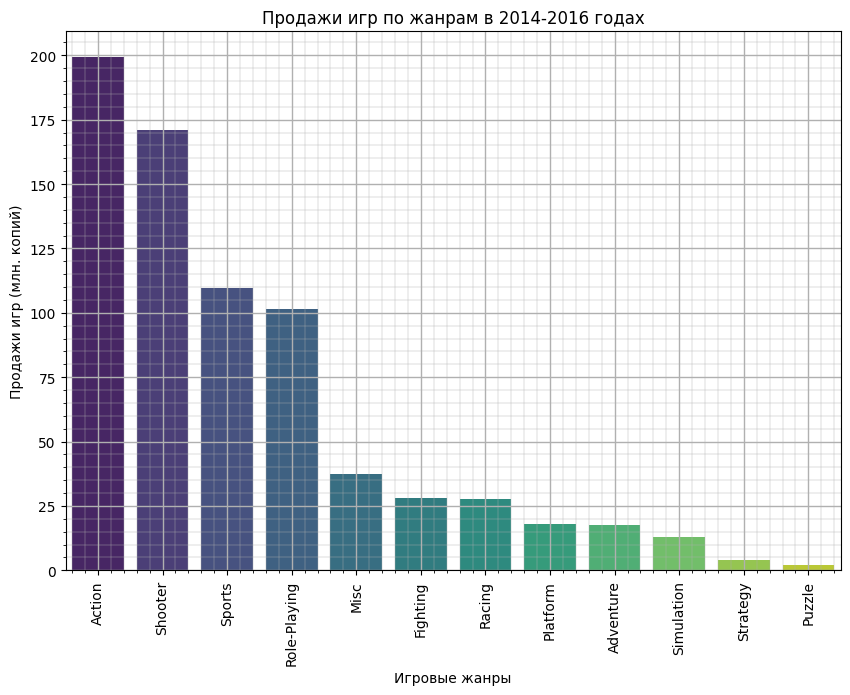

In [ ]:
ax=sns.barplot(y='total_sales', x='genre', data=data_genre_total_after_2013, palette=sns.color_palette('viridis', 12))
ax.set_title('Продажи игр по жанрам в 2014-2016 годах', size=12)
ax.set_xlabel('Игровые жанры', size=10)
ax.set_ylabel('Продажи игр (млн. копий)', size=10)
ax.grid(False)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.xticks(rotation=90)
plt.show()

*Больше всего за период 2014-2016 продано игр в жанре Action (199,36 млн.копий), Shooter (170,94 млн.копий), Sports (109,48 млн.копий), Role-Playing (101,44 млн.копий). Самые низкие суммарные продажи у игр с жанрами Puzzle (2,21 млн.копий) и Strategy (3,96 млн.копий)*

In [ ]:
# проанализируем медианные продажи игр по жанрам
data_genre_median_after_2013=(data[data['year_of_release']>2013].groupby('genre', as_index = False).
               agg({'total_sales': 'median'}).sort_values(by='total_sales', ascending=False))
data_genre_median_after_2013

,genre,total_sales
8,Shooter,0.515
10,Sports,0.180
4,Platform,0.140
2,Fighting,0.125
7,Role-Playing,0.110
9,Simulation,0.100
0,Action,0.090
3,Misc,0.090
6,Racing,0.090
11,Strategy,0.060


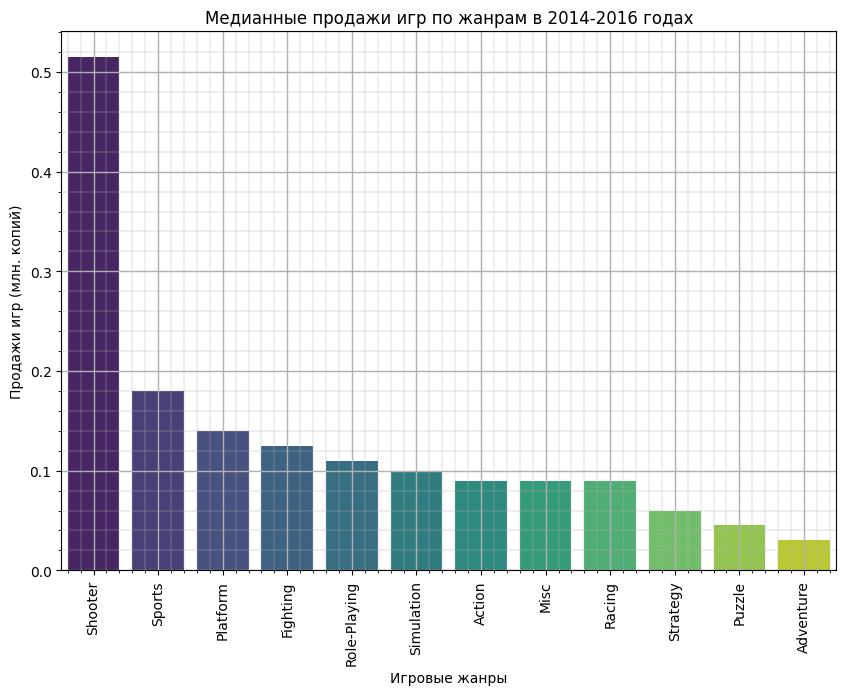

In [ ]:
ax=sns.barplot(y='total_sales', x='genre', data=data_genre_median_after_2013, palette=sns.color_palette('viridis', 12))
ax.set_title('Медианные продажи игр по жанрам в 2014-2016 годах', size=12)
ax.set_xlabel('Игровые жанры', size=10)
ax.set_ylabel('Продажи игр (млн. копий)', size=10)
ax.grid(False)
ax.grid(True, which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.3)
ax.minorticks_on()
plt.xticks(rotation=90)
plt.show()

*Самые успешный жанр - Shooter (медианное значение продаж - 515 тыс.копий на одну игру), на втором месте Sports (180 тыс.копий). Медианное значение продаж игр в жанре Action составляет всего 90 тыс.копий.*

**Вывод по разделу "Проведение исследовательского анализа данных":**
1. Представлены данные о выпуске видеоигр с 1980 года по 2016 год, пик производства игр приходится на 2008-2009 годы - более 1400 видеигр в год, с 2012 наблюдается спад производства, далее почти равномерный выпуск 500-600 видеоигр в год.
2. По продажам за весь рассматриваемый период лидируют платформы: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', продолжительность жизни игровых топ-6 платформ примерно одинаковая - в течение 9-11 лет наблюдаем подъем, затем спад продаж.
3. Так как анализируемые данные из динамично развивающейся игровой сферы, где технические новшества и тренды быстро меняются, выбран период для проведения исследовательского анализа с 2014 по 2016 год.
4. Самой продаваемой после 2014 года стала платформа 'PS4' с объемом продаж за период с 2014 по 2016 год - 288 млн. копий.
5. За 2016 год по продажам лидируют платформы 'PS4' - 69,25 млн.копий, 'XOne' - 26,15 млн.копий, '3DS' - 15,14 млн.копий, продажи по всем платформам падают.
6. Наиболее перспективными в плане продаж явлюятся платформы 'PS4', 'XOne' и '3DS'. Пик продаж 'PS4' и 'XOne' приходится на 2015 год, обе испытывают спад производства в течение последнего года, продолжительность жизни на момент анализа составляет 3 года при среднем значении 6 лет, что дает вероятность продолжения их продаж в течении еще 1-3 лет. На платформу '3DS' стоит обратить внимание в краткосрочной перспективе, т.к ее lifetime на момент исследования уже составляет 5 лет.
7.  Меньше всего размах значений продаж у платформы '3DS' (около 500 тыс.копий), у 'PS4' и 'XOne' в три раза больше - до 1,5 млн.копий. Самое высокое медианное значение глобальных продаж у платформы 'XOne' - более 205 тыс. копий, 'PS4' - 185 тыс. копий, '3DS' - 90 тыс. копий
8. По всем платформам наблюдается средняя или слабая положительная корреляция объема продажи игр и оценки критиков. Взаимосвязь между объемами продаж и оценками пользователей не установлена (корреляция или отрицательная, или слабая положительная).
9. Больше всего за период 2014-2016 продано игр в жанре Action (199,36 млн.копий), Shooter (170,94 млн.копий), Sports (109,48 млн.копий), Role-Playing (101,44 млн.копий).
10. Самые успешный жанр по продажам - Shooter (медианное значение продаж - 515 тыс.копий на одну игру), на втором месте Sports (180 тыс.копий). Игры в жанре Action продаются в среднем по 90 тыс.копий, высокие суммарные продажи у жанра Action связаны с огромным количеством игр в этом жанре.

## Составление портрета пользователя каждого региона

**Определим самые популярные платформы (топ-5) для каждого региона (NA, EU, JP) и исследуем разлиячия по регионам**

In [ ]:
na_platform_top_5=(data[(data['year_of_release']>2013)].groupby('platform', as_index = False).
               agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False))[:5]
na_platform_top_5

,platform,na_sales
3,PS4,98.610
9,XOne,81.270
8,X360,28.300
0,3DS,22.640
2,PS3,22.050


In [ ]:
eu_platform_top_5=(data[(data['year_of_release']>2013)].groupby('platform', as_index = False).
               agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False))[:5]
eu_platform_top_5

,platform,eu_sales
3,PS4,130.040
9,XOne,46.250
2,PS3,25.540
1,PC,17.970
0,3DS,16.120


In [ ]:
jp_platform_top_5=(data[(data['year_of_release']>2013)].groupby('platform', as_index = False).
               agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False))[:5]
jp_platform_top_5

,platform,jp_sales
0,3DS,44.240
3,PS4,15.020
5,PSV,14.540
2,PS3,11.220
7,WiiU,7.310


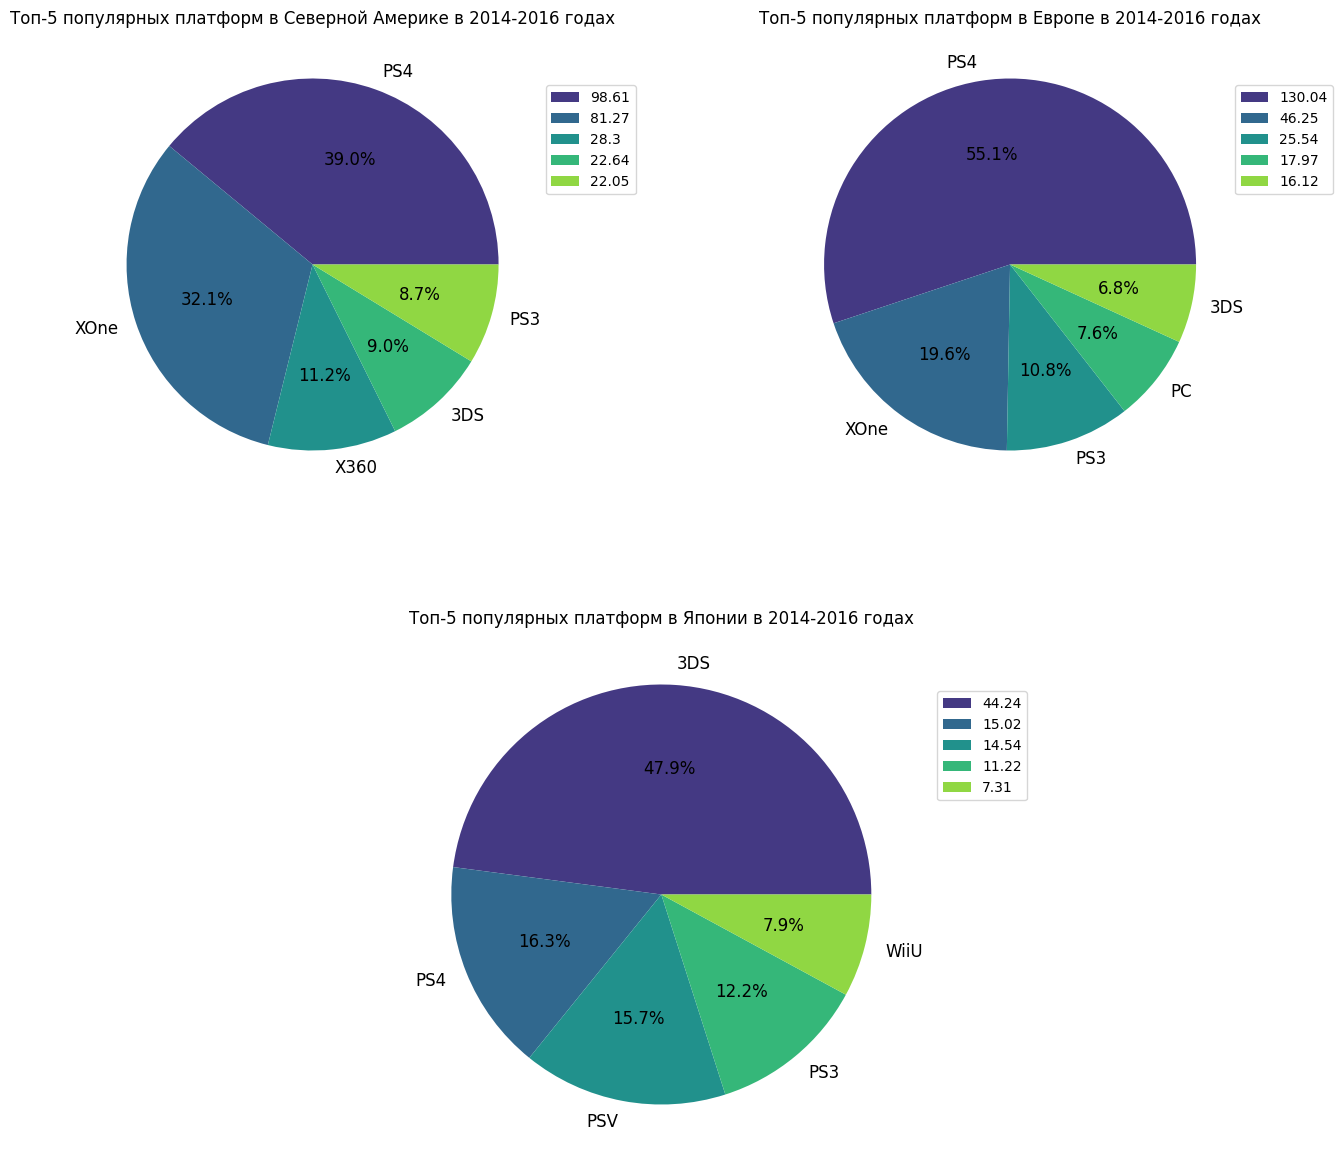

In [ ]:
fig=plt.figure(figsize=(15, 15))

ax1=fig.add_subplot(2,2,1)
ax1.pie(na_platform_top_5['na_sales'], labels=na_platform_top_5['platform'], \
           colors=sns.color_palette('viridis', 5), \
           autopct='%.1f%%', textprops={'size': 'large'})
ax1.set_title('Топ-5 популярных платформ в Северной Америке в 2014-2016 годах', size=12)
ax1.legend(
    bbox_to_anchor = (0.96, 0.45, 0.25, 0.45),
    labels = round(na_platform_top_5['na_sales'], 2))

ax2=fig.add_subplot(2,2,2)
ax2.pie(eu_platform_top_5['eu_sales'], labels=eu_platform_top_5['platform'], \
           colors=sns.color_palette('viridis', 5), \
           autopct='%.1f%%', textprops={'size': 'large'})
ax2.set_title('Топ-5 популярных платформ в Европе в 2014-2016 годах')
ax2.legend(
    bbox_to_anchor = (0.96, 0.45, 0.25, 0.45),
    labels = round(eu_platform_top_5['eu_sales'], 2))

ax3=fig.add_subplot(2,1,2)
ax3.pie(jp_platform_top_5['jp_sales'], labels=jp_platform_top_5['platform'], \
           colors=sns.color_palette('viridis', 5), \
           autopct='%.1f%%', textprops={'size': 'large'})
ax3.set_title('Топ-5 популярных платформ в Японии в 2014-2016 годах')
ax3.legend(
    bbox_to_anchor = (0.96, 0.45, 0.25, 0.45),
    labels = round(jp_platform_top_5['jp_sales'], 2))

plt.subplots_adjust(wspace=0.5)
plt.show()

*В **Северной Америке** в 2014-2016 годах больше всего продано игр на платформах PS4, XOne, X360, 3DS и PS3.*

*В **Европе** топ-5 практически идентичен американскому, только не вошла платформа X360 (игровая приставка от американской компании Microsoft), вместо нее в топ-5 вошла платформа PC.*

*В **Японии** в топ-5 попали платформы только японских производителей. Лидирует японская платформа 3DS (производства Nintendo), на японском рынке продано 44,24 млн.копий, далее идут платформы японской компании Sony (PS4, PSV, PS3) и Nintendo (WiiU).*

**Определим самые популярные жанры (топ-5) для каждого региона (NA, EU, JP) и исследуем разлиячия по регионам**

In [ ]:
na_genre_top_5=(data[(data['year_of_release']>2013)].groupby('genre', as_index = False).
               agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False))[:5]
na_genre_top_5

,genre,na_sales
8,Shooter,79.020
0,Action,72.530
10,Sports,46.130
7,Role-Playing,33.470
3,Misc,15.050


In [ ]:
eu_genre_top_5=(data[(data['year_of_release']>2013)].groupby('genre', as_index = False).
               agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False))[:5]
eu_genre_top_5

,genre,eu_sales
0,Action,74.680
8,Shooter,65.520
10,Sports,45.730
7,Role-Playing,28.170
6,Racing,14.130


In [ ]:
jp_genre_top_5=(data[(data['year_of_release']>2013)].groupby('genre', as_index = False).
               agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False))[:5]
jp_genre_top_5

,genre,jp_sales
7,Role-Playing,31.160
0,Action,29.580
2,Fighting,6.370
3,Misc,5.610
8,Shooter,4.870


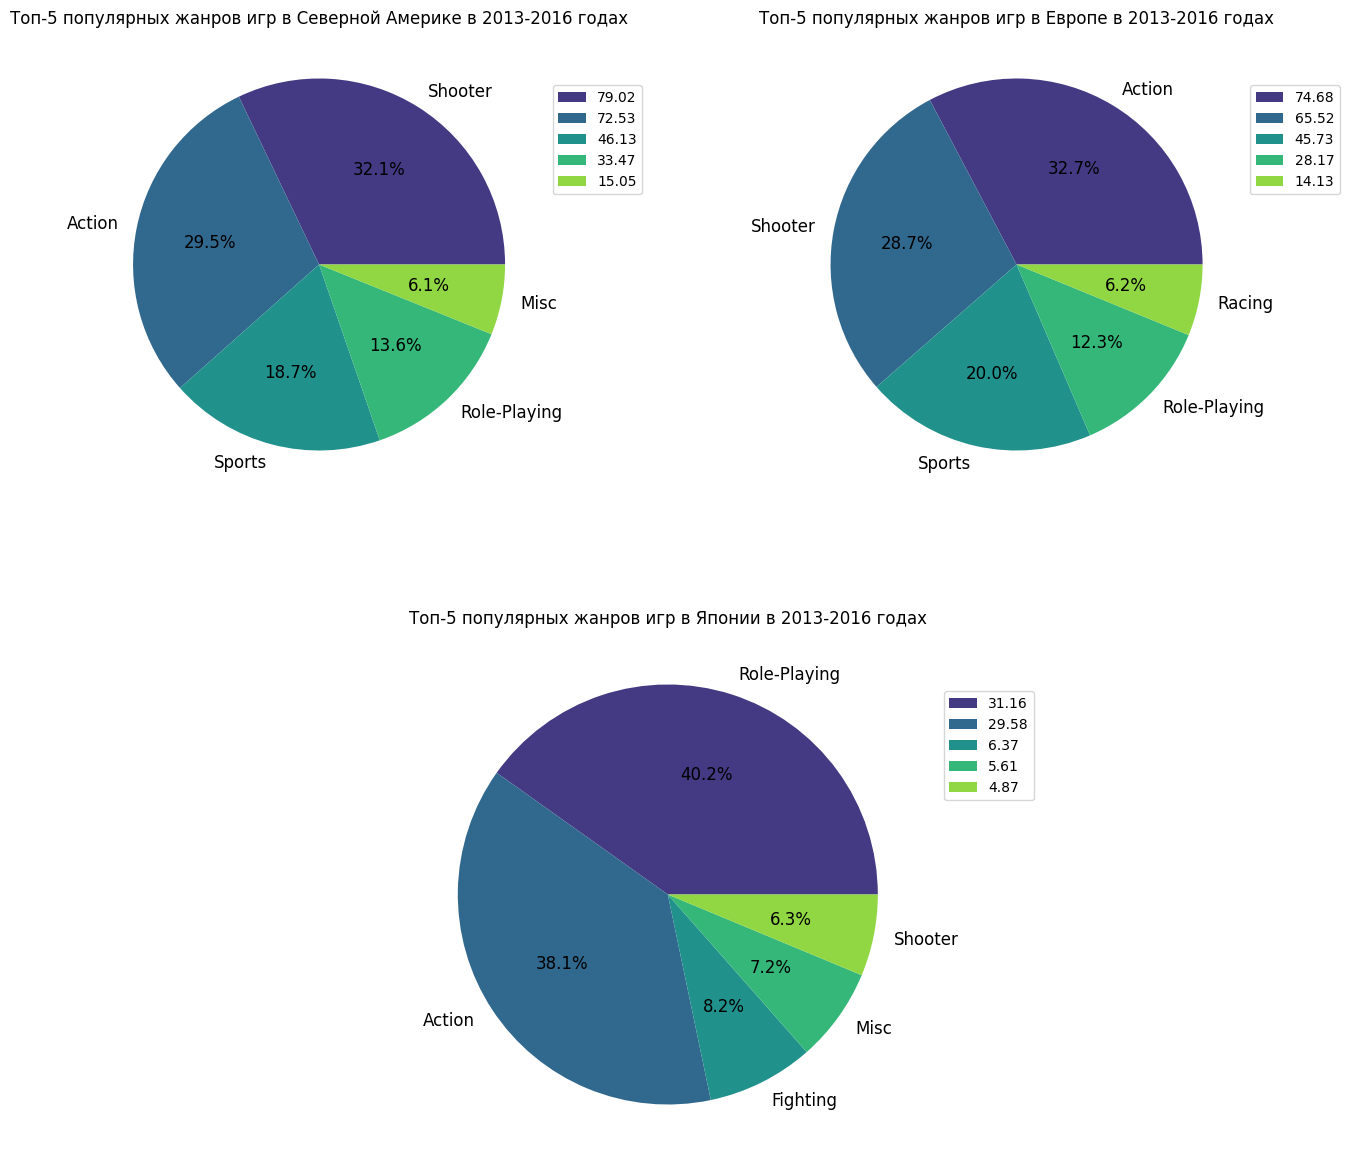

In [ ]:
fig=plt.figure(figsize=(15, 15))

ax1=fig.add_subplot(2,2,1)
ax1.pie(na_genre_top_5['na_sales'], labels=na_genre_top_5['genre'], \
           colors=sns.color_palette('viridis', 5), \
           autopct='%.1f%%', textprops={'size': 'large'})
ax1.set_title('Топ-5 популярных жанров игр в Северной Америке в 2013-2016 годах', size=12)
ax1.legend(
    bbox_to_anchor = (0.96, 0.45, 0.25, 0.45),
    labels = round(na_genre_top_5['na_sales'], 2))

ax2=fig.add_subplot(2,2,2)
ax2.pie(eu_genre_top_5['eu_sales'], labels=eu_genre_top_5['genre'], \
           colors=sns.color_palette('viridis', 5), \
           autopct='%.1f%%', textprops={'size': 'large'})
ax2.set_title('Топ-5 популярных жанров игр в Европе в 2013-2016 годах')
ax2.legend(
    bbox_to_anchor = (0.96, 0.45, 0.25, 0.45),
    labels = round(eu_genre_top_5['eu_sales'], 2))

ax3=fig.add_subplot(2,1,2)
ax3.pie(jp_genre_top_5['jp_sales'], labels=jp_genre_top_5['genre'], \
           colors=sns.color_palette('viridis', 5), \
           autopct='%.1f%%', textprops={'size': 'large'})
ax3.set_title('Топ-5 популярных жанров игр в Японии в 2013-2016 годах')
ax3.legend(
    bbox_to_anchor = (0.96, 0.45, 0.25, 0.45),
    labels = round(jp_genre_top_5['jp_sales'], 2))

plt.subplots_adjust(wspace=0.5)
plt.show()

*Предпочтения пользователей в **Северной Америке** совпадают с предпочтениями пользователей из **Европы** - в лидерах продаж жанры игр Action и Shooter. В **Японии** больше предпочитают игры Role-Playing и Action.*

**Исследуем влияет ли рейтинг ESRB на продажи в отдельном регионе (NA, EU, JP).**

ESRB – американская система возрастной классификации видеоигр, предоставляющая информацию о содержании видеоигр. Данная система действует с 1994 года и используется в США, Канаде и Мексике.

- **EC** (Early Childhood): для детей младшего возраста.
- **E** (Everyone): для всех возрастов.
- **E10+** (Everyone 10 and older): от 10 лет и старше.
- **T** (Teen): от 13 лет и старше.
- **M** (Mature): от 17 лет и старше.
- **AO** (Adults Only): только для взрослых.
- **RP** (Rating Pending): окончательный рейтинг ESRB ещё не присвоен

In [ ]:
na_rating=(data[(data['year_of_release']>2013)].groupby('rating', as_index = False).
               agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False))
na_rating

,rating,na_sales
2,M,96.420
4,unknown,64.720
0,E,50.740
3,T,38.950
1,E10+,33.230


In [ ]:
eu_rating=(data[(data['year_of_release']>2013)].groupby('rating', as_index = False).
               agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False))
eu_rating

,rating,eu_sales
2,M,93.440
4,unknown,58.950
0,E,58.060
3,T,34.070
1,E10+,26.160


In [ ]:
jp_rating=(data[(data['year_of_release']>2013)].groupby('rating', as_index = False).
               agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False))
jp_rating

,rating,jp_sales
4,unknown,56.900
3,T,14.780
0,E,8.940
2,M,8.010
1,E10+,4.460


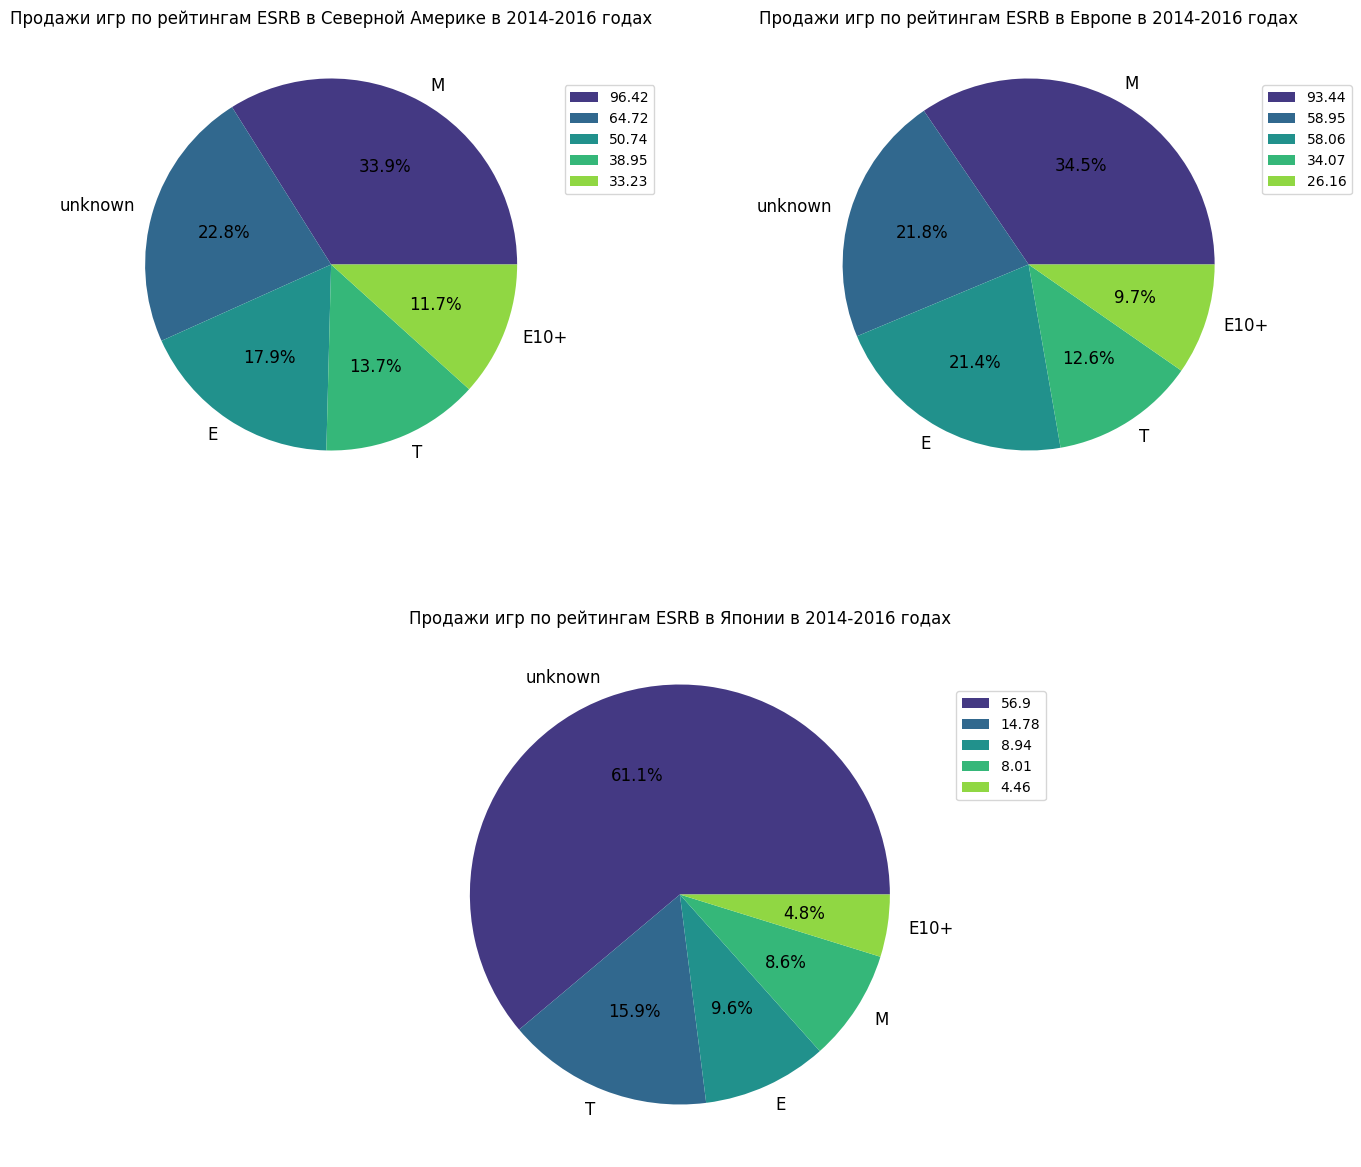

In [ ]:
# в связи с несущественными или нулевыми продажами после 5 позиции во всех регионах, выведем только топ-5 рейтингов
na_rating=na_rating[:5]
eu_rating=eu_rating[:5]
jp_rating=jp_rating[:5]

fig=plt.figure(figsize=(15, 15))

ax1=fig.add_subplot(2,2,1)
ax1.pie(na_rating['na_sales'], labels=na_rating['rating'], \
           colors=sns.color_palette('viridis', 5), \
           autopct='%.1f%%', textprops={'size': 'large'})
ax1.set_title('Продажи игр по рейтингам ESRB в Северной Америке в 2014-2016 годах', size=12)
ax1.legend(
    bbox_to_anchor = (0.96, 0.45, 0.25, 0.45),
    labels = round(na_rating['na_sales'], 2))

ax2=fig.add_subplot(2,2,2)
ax2.pie(eu_rating['eu_sales'], labels=eu_rating['rating'], \
           colors=sns.color_palette('viridis', 5), \
           autopct='%.1f%%', textprops={'size': 'large'})
ax2.set_title('Продажи игр по рейтингам ESRB в Европе в 2014-2016 годах')
ax2.legend(
    bbox_to_anchor = (0.96, 0.45, 0.25, 0.45),
    labels = round(eu_rating['eu_sales'], 2))

ax3=fig.add_subplot(2,1,2)
ax3.pie(jp_rating['jp_sales'], labels=jp_rating['rating'], \
           colors=sns.color_palette('viridis', 5), \
           autopct='%.1f%%', textprops={'size': 'large'})
ax3.set_title('Продажи игр по рейтингам ESRB в Японии в 2014-2016 годах')
ax3.legend(
    bbox_to_anchor = (0.96, 0.45, 0.25, 0.45),
    labels = round(jp_rating['jp_sales'], 2))

plt.subplots_adjust(wspace=0.5)
plt.show()

*Структура продаж игр за период 2014-2016 г. по рейтингам ESRB схожа в **Северной Америке и в Европе**. Значительную долю рынка в обоих регионах занимают игры возрастной категории М (17+) и Е (для всех возрастов), далее категориия игр для подростков Т и детей Е10+. Доля пропущенных рейтингов значительна в обоих регионах - 22,8% и 21,8%*  

*В **Японии** доля пропущенных рейтингов составляет 61,1% в связи с существованием в стране своей рейтинговой системы CERO. Из присвоенных по системе ESRB игр лидируют игры категории Т (13+) и Е (для всех возрастов), далее игры с рейтингом М (17+) и Е10+ (10+)*

**Вывод по разделу "Составление портрета пользователя каждого региона":**
1. Пользователи из **Северной Америки** в 2014-2016 годах больше всего покупали игры на платформах PS4, XOne, X360, 3DS и PS3. Популярнее у американцев были игры Action и Shooter. Значительную долю американского рынка занимали игры возрастной категории М (17+) и Е (для всех возрастов), далее категориия игр для подростков Т (13+) и детей Е10+ (10+).

2. В **Европе** топ-5 платформ практически идентичен американскому, только не вошла платформа X360 (игровая приставка от американской компании Microsoft), вместо нее в топ-5 вошла платформа PC. Предпочтения европейцев совпадают с предпочтениями американцев - в лидерах продаж жанры игр Action и Shooter. Структура продаж игр по рейтингам ESRB в Европе схожа с Америкой - также значительную долю рынка занимают игры возрастной категории М (17+) и Е (для всех возрастов).

3. В **Японии** в топ-5 попали платформы только японских производителей. Лидирует японская платформа 3DS (производства Nintendo), далее идут платформы японской компании Sony (PS4, PSV, PS3) и Nintendo (WiiU). В Японии больше предпочитают игры Role-Playing и Action. Доля пропущенных рейтингов ESRB составляет 61,1% в связи с существованием в стране своей рейтинговой системы CERO. Из присвоенных по системе ESRB игр лидируют игры категории Т (13+) и Е (для всех возрастов), далее игры с рейтингом М (17+) и Е10+ (10+).

## Проверка гипотез

**Сформулируем 1-ую гипотезу:**

- Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC равны (за период 2014-2016г.)

- Альтернативная гипотеза - средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC (за период 2014-2016г.)

**Так как для проведения теста берем две выборки и они независимы между собой, то применим двухвыборочный t-тест для независимых выборок `scipy.stats.ttest_ind()`**

**Критический уровень статистической значимости примем 0.05**

In [ ]:
# для проверки гипотезы из датафрейма data возьмем данные о пользовательских рейтингах
# платформы XOne и PC (после 2013 года)
# + применим фильтры для заглушек mask_user_score
user_score_xone=data[(data['year_of_release']>2013) & (data['platform']=='XOne') & (mask_user_score)].reset_index(drop=True)['user_score']
user_score_pc=data[(data['year_of_release']>2013) & (data['platform']=='PC') & (mask_user_score)].reset_index(drop=True)['user_score']

In [ ]:
print(user_score_xone.count(), user_score_pc.count())

165 122


In [ ]:
print(f'Cредний пользовательский рейтинг по платформе XOne: {user_score_xone.mean()}')
print(f'Cредний пользовательский рейтинг по платформе PC: {user_score_pc.mean()}')

# зададим уровень значимости
alpha = 0.05

# ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу,
# выборки не равны по размеру, поэтому примем значение праметра equal_var=False
results = st.ttest_ind(user_score_xone, user_score_pc, equal_var=False)
print(f'p-value: {results.pvalue}')

# проверим p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Cредний пользовательский рейтинг по платформе XOne: 6.594545454545456
Cредний пользовательский рейтинг по платформе PC: 6.298360655737705
p-value: 0.11601398086668832
Нет оснований отвергнуть нулевую гипотезу


**Вывод:**
*Нулевая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не может быть отвергнута. Значение p-value показывает, что вероятность случайно получить такое же значение средней пользовательской оценки или более удаленное значение от него равна 11.6%. Это большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими оценками двух платформ.*

**Сформулируем 2-ую гипотезу:**

- Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports равны (за период 2014-2016г.)

- Альтернативная гипотеза - средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports (за период 2014-2016г.)

**Так как для проведения теста берем две выборки и они независимы между собой, то применим двухвыборочный t-тест для независимых выборок `scipy.stats.ttest_ind()`**

**Критический уровень статистической значимости примем 0.05**

In [ ]:
# для проверки гипотезы из датафрейма data возьмем данные о пользовательских рейтингах
# жанров Action и Sports (после 2010 года)
# + применим фильтры для заглушек mask_user_score
user_score_action=data[(data['year_of_release']>2013) & (data['genre']=='Action') & (mask_user_score)].reset_index(drop=True)['user_score']
user_score_sports=data[(data['year_of_release']>2013) & (data['genre']=='Sports') & (mask_user_score)].reset_index(drop=True)['user_score']

In [ ]:
print(user_score_action.count(), user_score_sports.count())

297 127


In [ ]:
print(f'Cредний пользовательский рейтинг жанра Action: {user_score_action.mean()}')
print(f'Cредний пользовательский рейтинг жанра Sports: {user_score_sports.mean()}')

# зададим уровень значимости
alpha = 0.05

# ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу,
# выборки не равны по размеру, поэтому примем значение праметра equal_var=False
results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)
print(f'p-value: {results.pvalue}')

# проверим p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Cредний пользовательский рейтинг жанра Action: 6.760606060606061
Cредний пользовательский рейтинг жанра Sports: 5.2251968503937
p-value: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод:**
*Нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports отвергнута в пользу гипотезы о том, что их рейтинги не равны*

## Общий вывод и базовые рекомендации по ставке на потенциально популярный продукт на 2017 год

1. Наиболее перспективными в плане продаж на 2017 год явлюятся платформы 'PS4', 'XOne' и '3DS', т.к. эти платформы на момент проведения исследования лидеры продаж.  Продолжительность жизни 'PS4', 'XOne' на момент анализа составляет 3 года при средней продолжительности 6 лет, что дает вероятность продолжения их продаж в течении еще нескольких лет. На платформу '3DS' следует делать ставку только в краткосрочной перспективе, т.к ее lifetime на момент исследования составляет уже 5 лет.

2. Следует делать ставку на самый продаваемый жанр Shooter.

3. Также следует делать ставку на самые продаваемые игры в следующих возрастных категориях по системе ESRB: М (17+) и Е (для всех возрастов).

4. При выборе для реализации игр следует ориентироваться только на оценки критиков, т.к. установлена положительная корреляция между оценками и объемом продаж, влияние оценок пользователей не выявлено.